# Assignment 1: k-nearest neighbors (Programming) 

Only use the already imported libraries `numpy` and `matplotlib.pyplot` for the assignment. Do not import any other library. 

==> *Write*
* *names* 
* *matr. nr.* 
* *study program*
* *B.Sc./M.Sc.*
Dao Khanh Duy_3591406_INFOTECH_M.Sc.
Harshal Sanjay Nandigramwar_INFOTECH_M.Sc.
Xiwen Feng_3219649_Natural Language Processing_B.Sc.
*of all assignment group participants here.* (double klick here to edit)*

In [27]:
# Load required packages and dataset. Do not modify.
import matplotlib.pyplot as plt
import numpy as np

def load_breast_cancer_dataset():
    from sklearn import datasets
    breast_cancer = datasets.load_breast_cancer()
    X = breast_cancer.data
    y = breast_cancer.target
    return X, y
    
X, y = load_breast_cancer_dataset()


## Task 1: Visualization and Preprocessing

1) Explain the content of the dataset in few words. What are the input features? What is the classification target? Check out: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


==> *Write your response here.* (double klick here to edit)
Dataset consists of 569 instances with 32 input features:
a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1

Classification target is diagnosis of digitized image of a fine needle aspirate (FNA) of a breast mass

2) Compute and print the following statistics about the dataset:
  - Number of samples
  - Number of samples per class
  - Mean and standard deviation for each input feature


In [28]:
# Implement your solution here.
print('X:')
print(X)
print('y:')
print(y)
print('Number of samples:',len(X))
print()
print('Number of samples of class 0:',np.sum(y==0))
print('Number of samples of class 1:',np.sum(y==1))
i = 0
for i in range(len(X[0])):
    print('Mean of data column',i ,':',np.mean(X[:,i]))
    print('Standard Deviation of data column',i,':',np.std(X[:,i]))
    print()
    i=i+1


X:
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
y:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 

3) Visualize the variables *radius (mean)* and *texture (mean)* in a scatter plot (*radius (mean)* on the x-axis, *texture (mean)* on the y-axis). Color each point of the plot according to its class.

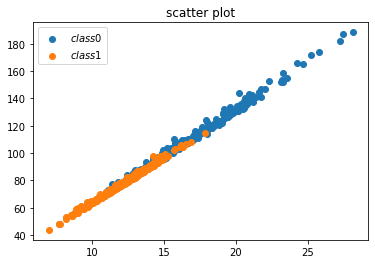

In [29]:
# Implement your solution here.
class0 = np.where(y == 0)
class1 = np.where(y == 1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('scatter plot')
ax.scatter(X[class0,0],X[class0,2],label = '$class0$')
ax.scatter(X[class1,0],X[class1,2],label = '$class1$')

plt.legend()
plt.show()

4) Split the dataset randomly into training and test data. 70% of data should be used for training and 30% should be used for testing. Implement the function `train_test_split`. Do not modify the interface of the function.

In [30]:
def train_test_split(X, y):
    """
    Returns X_train, X_test, y_train, y_test, 
        where X_train and X_test are the input features of the training and test set,
        and y_train and y_test are the class labels of the training and test set.
    """
    threshold = int(0.7*X.shape[0])
    rnd_idx = np.random.permutation(X.shape[0])
    
    X_train = X[rnd_idx[:threshold]]
    X_test = X[rnd_idx[threshold:]]
    y_train = y[rnd_idx[:threshold]]
    y_test = y[rnd_idx[threshold:]]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y)

assert (X_train.shape[0] + X_test.shape[0]) == X.shape[0]
assert (y_train.shape[0] + y_test.shape[0]) == y.shape[0]
assert X_train.shape[1] == X_test.shape[1]

5) kNN uses a distance measure to identify close neighbors. If the input features are not of the same scale, the distance is not as meaningful, which can negatively impact classification performance. Perform min-max scaling (i.e. scale the values of the input features in such a way that their range is from 0 to 1) on the training and test data. Remember that you should only use information from the training data to perform the scaling on both data sets.

In [31]:
# Implement your solution here
def min_max_scaling(X_train, X_test):
    X_column =  np.size(X_train,1)
    for i in range(0,X_column):
        a=max(X_train[:,i])
        X_train[:,i]=X_train[:,i]/a
        X_test[:,i]=X_test[:,i]/a
    return X_train,X_test

X_train,X_test= min_max_scaling(X_train, X_test)

## Task 2: k-nearest neighbors 
*Choose classes randomly if weights are equal for multiple classes*

**For B.Sc. Data Science:**  

Implement the kNN algorithm with uniform weighting and arbitrary `k`. Fill out the `predict` method of class `KNearestNeighbors`. 

Use Euclidean distance to determine the nearest neighbors.
You can ignore the optional parameter `weights`, which is provided as a field in the kNN class.

**For all students other than B.Sc. Data Science:**

Implement the kNN algorithm with uniform and distance-based weighting and arbitrary `k`.
Fill out the `predict` method of class `KNearestNeighbors`.

The parameter `weights` will either contain the string `uniform` or `distance`. 
- If the value is `uniform`, the classifier should use the Euclidean distance for determining nearest neighbors and uniform weighting. 
- If the value is a `distance`, the classifier should use the Euclidean distance for determining neares neighbors and perform distance-weighted classification.

In [32]:
class KNearestNeighbors(object):
    def __init__(self, k, weights='uniform'):
        self.k = k
        self.weights = weights
        
    def fit(self, X, y):
        """
        This functions saves the training data to be used during the prediction.
        """
        self.X = X
        self.y = y
    
    def predict(self, X):
        """
        Returns a vector of shape (n,) if X has shape (n,d), 
        where n is the number of samples and d is the number of features.
        """
        # Implement your solution here.
        h=np.array([],dtype=np.int64) 
        
        for i in range(0,len(X[:,1])):
            a=np.array([])
            for j in range(0,len(self.X[:,1])):
                if self.weights == 'uniform':
                    b=euclidean_distance(X[i,:],self.X[j,:])
                else:
                     b=self.weights(X[i,:],self.X[j,:])
                a=np.append(a,b)
            index=np.argsort(a)
            kindex=np.array([],dtype=np.int64)   
            for ii in range(0,self.k):
                kindex=np.append(kindex,self.y[index[ii]])
            h=np.append(h,np.argmax(np.bincount(kindex)))
        return h
        

    
def euclidean_distance(x1, x2):
    """
    Given vectors x1 and x2 with shape (n,) returns distance between vectors as float.
    """
    return np.sqrt(np.sum((x1 - x2)*(x1 - x2)))

## Task 3: Evaluation

1) Implement functions to compute precision, recall and F1-score. `y_pred` and `y_true` are the vectors of predicted and true class labels respectively with shape `(n,)`, where `n` is the number of samples. Each function should return a float containing the corresponding score. It is advisable to implement a function for the confusion matrix and reuse it.

In [33]:
def precision(y_pred, y_true):
    # Implement your solution here.
    c_Num=np.bincount(y_true)
    p_Num=np.bincount(y_pred)
    p_V=np.array([],dtype=np.int64)
    for i in range(0,len(c_Num)):
        aa=np.argwhere((y_pred==y_true) & (y_pred==i))
        precision=aa.size/p_Num[i]
        p_V=np.append(p_V,precision)
    return p_V  
        

def recall(y_pred, y_true):
    # Implement your solution here.
    c_Num=np.bincount(y_true)
    p_Num=np.bincount(y_pred)
    r_V=np.array([],dtype=np.int64)
    for i in range(0,len(c_Num)):
        aa=np.argwhere((y_pred==y_true) & (y_pred==i))
        recall=aa.size/c_Num[i]
        r_V=np.append(r_V,recall)
    return r_V  


def f1score(y_pred, y_true):
    # Implement your solution here.
    p_V=precision(y_pred, y_true)
    r_V=recall(y_pred, y_true)
    f_V=np.array([],dtype=np.int64)
    for i in range(0,len(p_V)):
        f=2*r_V[i]*p_V[i]/(r_V[i]+p_V[i])
        f_V=np.append(f_V,f)
    return f_V
        

2) Evaluate the performance of kNN with uniform weighting on the Breast Cancer dataset for `k=1,5,9`. Train each of the `3` classifiers on the training data from Task 1. Perform the predictions on both the training and test data. Then compute precision, recall, and F1-score for each model and for both training and test data. Visualize the performance in a plot, what do you observe?

**For all students other than B.Sc. Data Science:** 

Also evaluate the kNN classifier with Euclidean distance-weighting. Compare the performance to uniform-weighting. How does the performance change compared to uniform weighting for each `k`?

In [34]:
# Implement your solution here.
for k in [1,3,5]:
    erfolg=KNearestNeighbors(k)
    erfolg.fit(X_train,y_train)
    h=erfolg.predict(X_test)
    print('X_Test precision k=',k,'',precision(h, y_test))
    print('X_Test recall k=',k,'',recall(h,y_test))
    print('X_Test f1score k=',k,'',f1score(h,y_test))
    h=erfolg.predict(X_train)
    print('X_train precision k=',k,'',precision(h, y_train))
    print('X_train recall k=',k,'',recall(h,y_train))
    print('X_train f1score k=',k,'',f1score(h,y_train))
    
def euclidean_distance2(x1, x2):
    """
    Given vectors x1 and x2 with shape (n,) returns distance between vectors as float.
    """
    return np.sqrt(np.sum((x1 - x2)*(x1 - x2)))*100/(0.1+np.sqrt(np.sum((x1 - x2)*(x1 - x2))))

erfolg=KNearestNeighbors(1,euclidean_distance2)
erfolg.fit(X_train,y_train)
h=erfolg.predict(X_test)
print('precision',precision(h, y_test))
print('recall',recall(h,y_test))
print('f1score',f1score(h,y_test))

X_Test precision k= 1  [0.91935484 0.97247706]
X_Test recall k= 1  [0.95       0.95495495]
X_Test f1score k= 1  [0.93442623 0.96363636]
X_train precision k= 1  [1. 1.]
X_train recall k= 1  [1. 1.]
X_train f1score k= 1  [1. 1.]
X_Test precision k= 3  [0.93442623 0.97272727]
X_Test recall k= 3  [0.95       0.96396396]
X_Test f1score k= 3  [0.94214876 0.96832579]
X_train precision k= 3  [1.         0.98007968]
X_train recall k= 3  [0.96710526 1.        ]
X_train f1score k= 3  [0.98327759 0.98993964]
X_Test precision k= 5  [0.94915254 0.96428571]
X_Test recall k= 5  [0.93333333 0.97297297]
X_Test f1score k= 5  [0.94117647 0.96860987]
X_train precision k= 5  [0.99315068 0.97222222]
X_train recall k= 5  [0.95394737 0.99593496]
X_train f1score k= 5  [0.97315436 0.98393574]
precision [0.91935484 0.97247706]
recall [0.95       0.95495495]
f1score [0.93442623 0.96363636]


==> *Write your observations here and report your results.* (double klick here to edit)
k bigger means that the results will be more precise. However, k can only get to a limit when we make a distance weighting, here i made an example with the weighting function (100/(0.1+x)),and it can also make results more presice